In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/city-quality-of-life-dataset/uaScoresDataFrame.csv


In [2]:
data_city=pd.read_csv('../input/city-quality-of-life-dataset/uaScoresDataFrame.csv')

In [3]:
data_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             266 non-null    int64  
 1   UA_Name                266 non-null    object 
 2   UA_Country             266 non-null    object 
 3   UA_Continent           266 non-null    object 
 4   Housing                266 non-null    float64
 5   Cost of Living         266 non-null    float64
 6   Startups               266 non-null    float64
 7   Venture Capital        266 non-null    float64
 8   Travel Connectivity    266 non-null    float64
 9   Commute                266 non-null    float64
 10  Business Freedom       266 non-null    float64
 11  Safety                 266 non-null    float64
 12  Healthcare             266 non-null    float64
 13  Education              266 non-null    float64
 14  Environmental Quality  266 non-null    float64
 15  Econom

In [4]:
data_city.head()

,Unnamed: 0,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,...,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,0,Aarhus,Denmark,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,...,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.373,3.1870,9.7385,4.1300
1,1,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,...,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.341,4.3285,7.8220,5.5310
2,2,Albuquerque,New Mexico,North America,7.2620,6.059,3.7720,1.493,1.4555,5.05575,...,1.3435,6.430000,4.1520,7.31950,6.5145,4.3460,5.396,4.8900,7.0285,3.5155
3,3,Almaty,Kazakhstan,Asia,9.2820,9.333,2.4585,0.000,4.5920,5.87125,...,7.3090,4.545667,2.2830,3.85675,5.2690,8.5220,2.886,2.9370,6.5395,5.5000
4,4,Amsterdam,Netherlands,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,...,8.5035,7.907333,6.1800,7.59725,5.0530,4.9550,4.523,8.8740,8.3680,5.3070


In [5]:
data_city.UA_Continent.unique()

array(['Europe', 'Oceania', 'North America', 'Asia', 'South America',
       'Africa'], dtype=object)

# Heatmap

In [6]:
#data_city.corr()

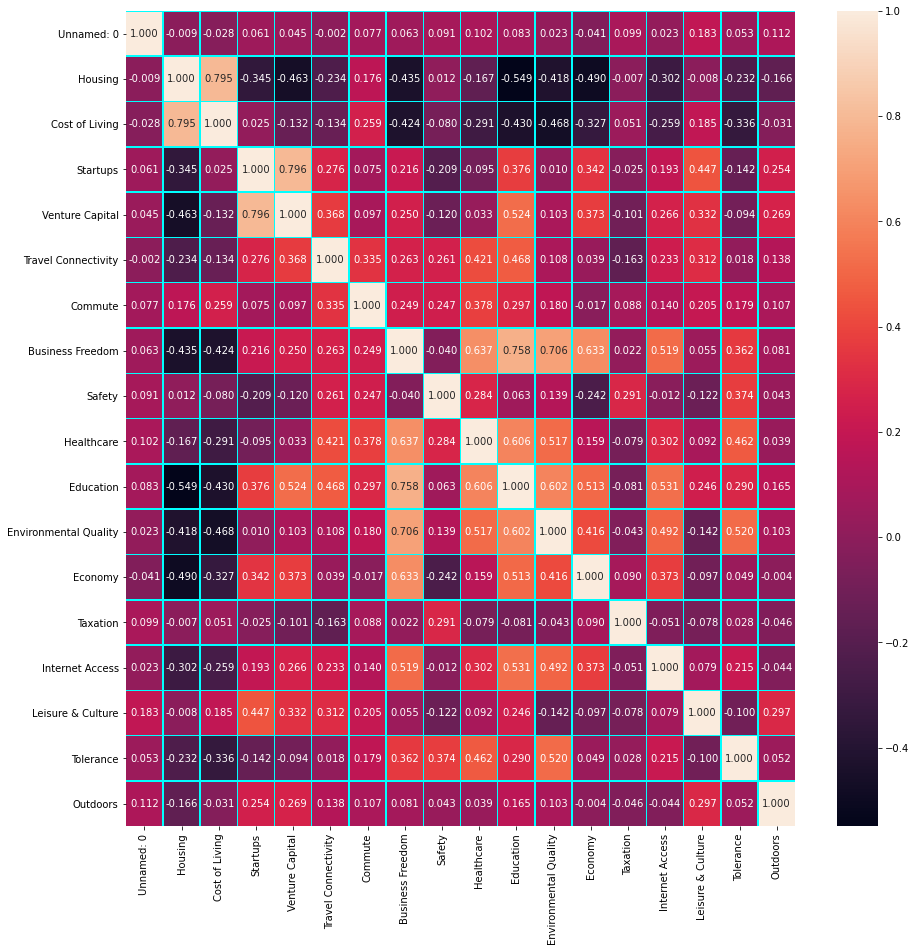

In [7]:
#correlation map
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(data_city.corr(), annot=True, linewidths=0.5,linecolor="cyan", fmt= '.3f',ax=ax)
plt.show()


**Values of Continents:**


In [8]:
continent_list=list(data_city.UA_Continent.unique())
continent_economy=[]
continent_safety=[]
continent_costliv=[]
continent_busiFree=[]
for i in continent_list:
    x=data_city[data_city.UA_Continent==i]
    continent_economy_average=sum(x.Economy)/len(x)
    continent_economy.append(continent_economy_average)
    continent_safety_av=sum(x.Safety)/len(x)
    continent_safety.append(continent_safety_av)
    continent_costliv_av=sum(x['Cost of Living'])/len(x)
    continent_costliv.append(continent_costliv_av)
    continent_busi_free=sum(x['Business Freedom'])/len(x)
    continent_busiFree.append(continent_busi_free)
data_con=pd.DataFrame({'continents': continent_list,
                         'eco': continent_economy,
                          'safety': continent_safety,
                      'costliv': continent_costliv,
                      'businessFree':continent_busiFree })


# Swarmplot for the Economies of the Continents

Text(0, 0.5, 'ECONOMY')

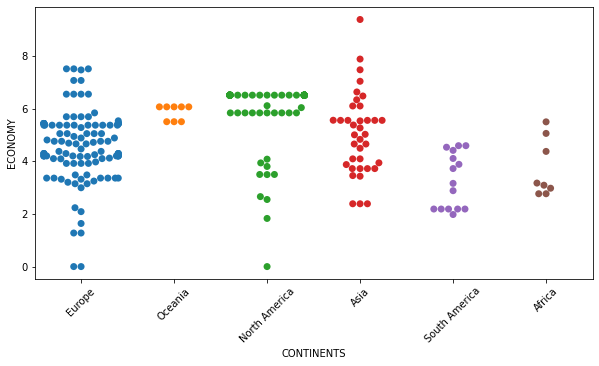

In [9]:
plt.figure(figsize=(10,5))
sns.swarmplot(x='UA_Continent',y='Economy',data=data_city,size=7)
plt.xticks(rotation=45)
plt.xlabel('CONTINENTS')
plt.ylabel('ECONOMY')

# Swarmplot for the Education of the Continents

Text(0, 0.5, 'EDUCATION')

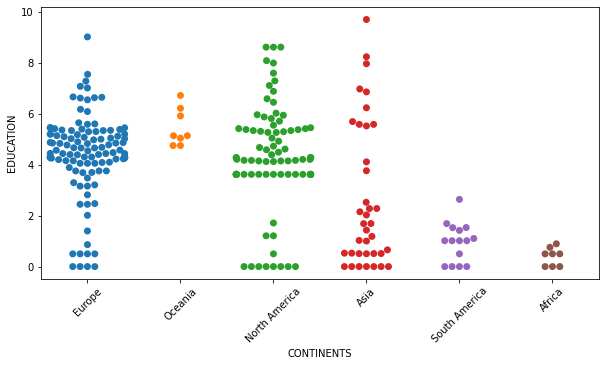

In [10]:
plt.figure(figsize=(10,5))
sns.swarmplot(x='UA_Continent',y='Education',data=data_city,size=7)
plt.xticks(rotation=45)
plt.xlabel('CONTINENTS')
plt.ylabel('EDUCATION')

# Swarmplot for the Cost of Living of the Continents

Text(0, 0.5, 'COST of LIVING')

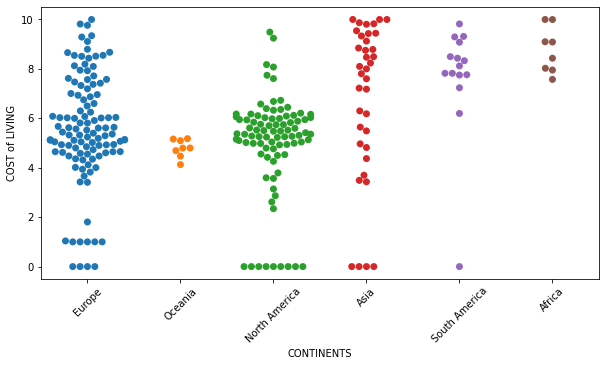

In [11]:
plt.figure(figsize=(10,5))
sns.swarmplot(x='UA_Continent',y='Cost of Living',data=data_city,size=7)
plt.xticks(rotation=45)
plt.xlabel('CONTINENTS')
plt.ylabel('COST of LIVING')

# Swarmplot for the Safety of the Continents

Text(0, 0.5, 'SAFETY')

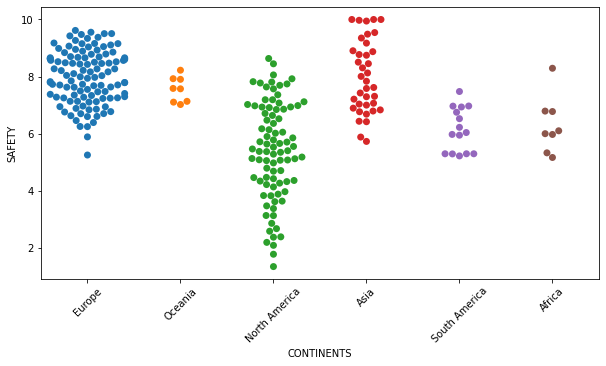

In [12]:
plt.figure(figsize=(10,5))
sns.swarmplot(x='UA_Continent',y='Safety',data=data_city,size=7)
plt.xticks(rotation=45)
plt.xlabel('CONTINENTS')
plt.ylabel('SAFETY')

# Swarmplot for the Business Freedom of the Continents

Text(0, 0.5, 'BUSSINESS FREEDOM')

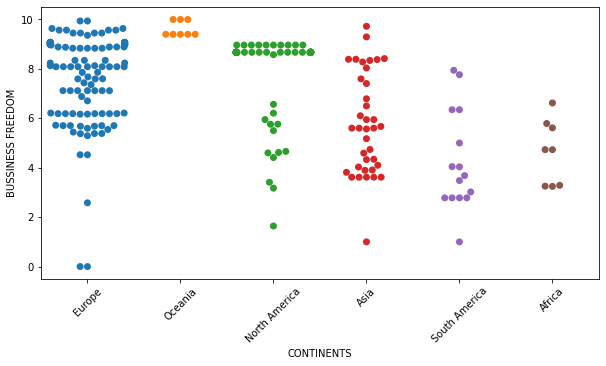

In [13]:
plt.figure(figsize=(10,5))
sns.swarmplot(x='UA_Continent',y='Business Freedom',data=data_city,size=7)
plt.xticks(rotation=45)
plt.xlabel('CONTINENTS')
plt.ylabel('BUSSINESS FREEDOM')

# Average Values of the Continents

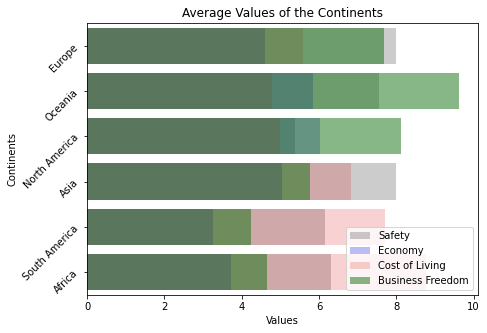

In [14]:
f,ax=plt.subplots(figsize=(7,5))
sns.barplot(y='continents',x='safety',data=data_con,color='black',alpha=0.2,label='Safety')
sns.barplot(y='continents',x='eco',data=data_con,color='blue',alpha=0.3,label='Economy')
sns.barplot(y='continents',x='costliv',data=data_con,color='red',alpha=0.2,label='Cost of Living')
sns.barplot(y='continents',x='businessFree',data=data_con,color='green',alpha=0.5,label='Business Freedom')

plt.ylabel('Continents')
plt.xlabel('Values')
plt.xticks(rotation=0)
plt.yticks(rotation=45)
plt.title('Average Values of the Continents')
ax.legend(loc='lower right',frameon = True)

plt.show()


# Top 50 Safest and Unsafe Cities


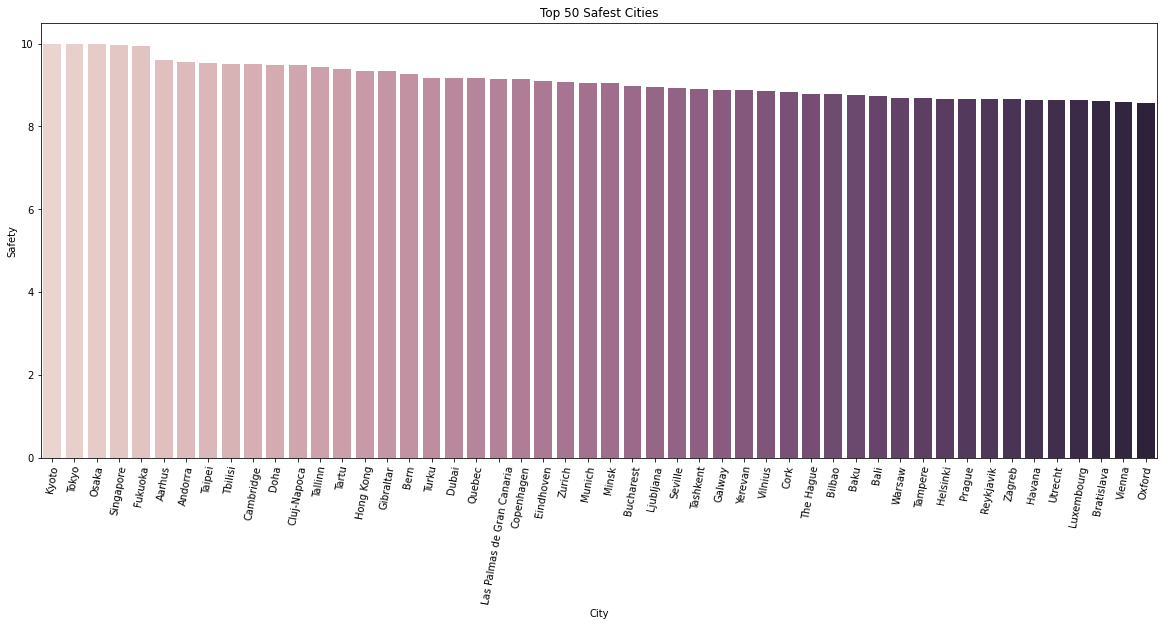

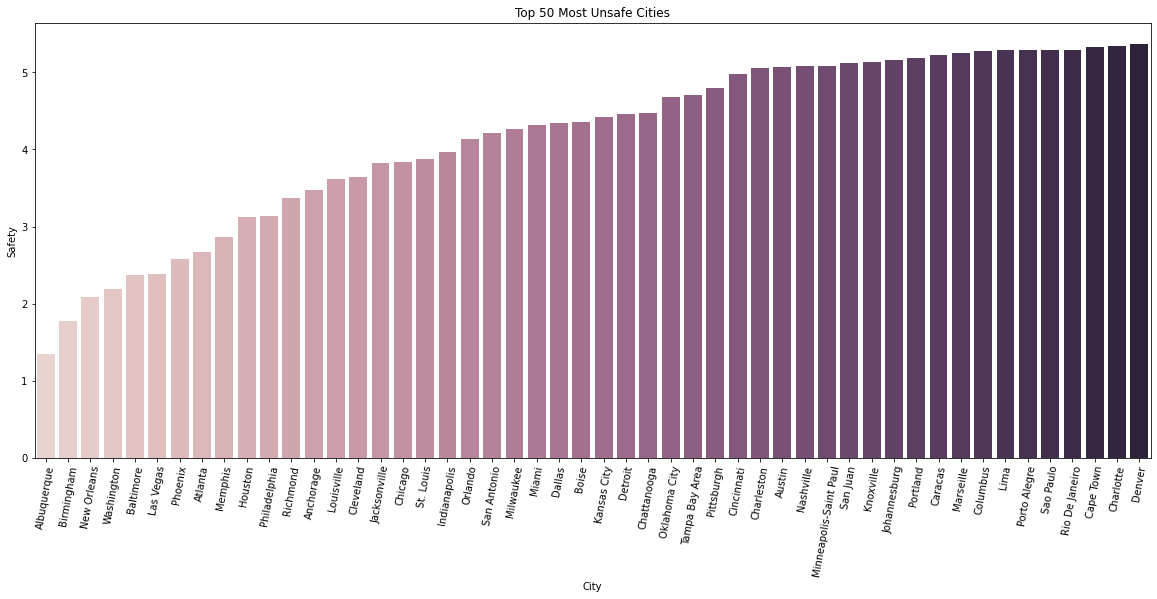

In [15]:
citySafety=pd.DataFrame(zip(data_city.UA_Name, data_city.Safety))
citySafety.columns=['City','Safety']
new_index=(data_city.Safety.sort_values(ascending=False)).index.values
citySafety=citySafety.reindex(new_index)

#BarPlot

#Safest
plt.figure(figsize=(20,8))
sns.barplot(x='City',y='Safety',data=citySafety[:50],palette=sns.cubehelix_palette(50))
plt.xticks(rotation=80)
plt.title('Top 50 Safest Cities')
plt.show()
#Most Unsafe
plt.figure(figsize=(20,8))
sns.barplot(x='City',y='Safety',data=citySafety[:215:-1],palette=sns.cubehelix_palette(50))
plt.xticks(rotation=80)
plt.title('Top 50 Most Unsafe Cities')
plt.show()

# 50 Cities with Lowest and Highest Cost of Living

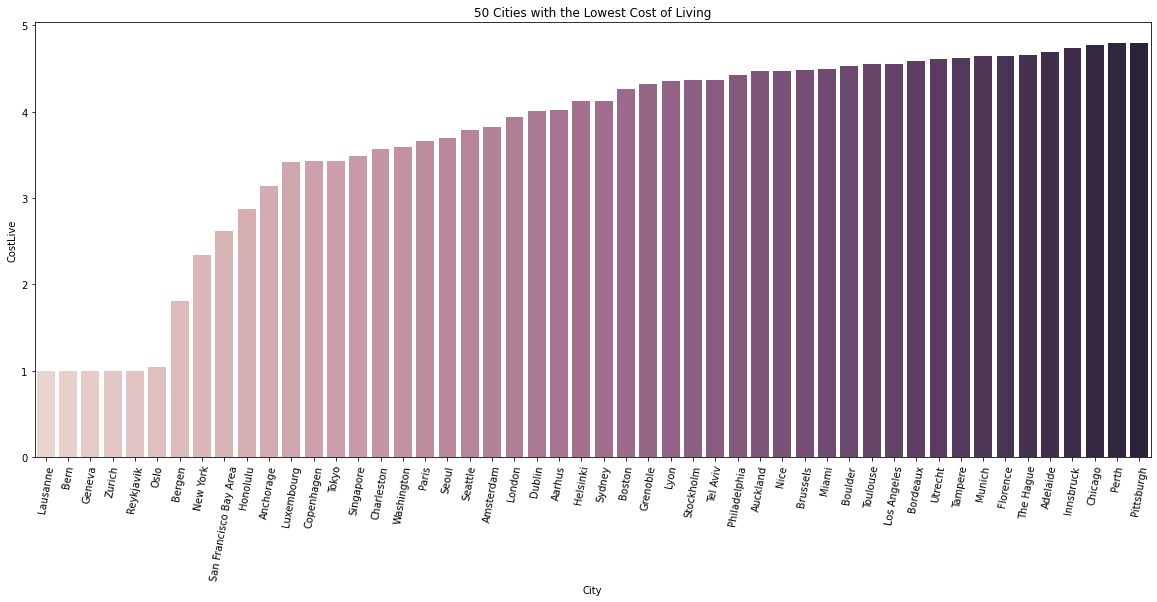

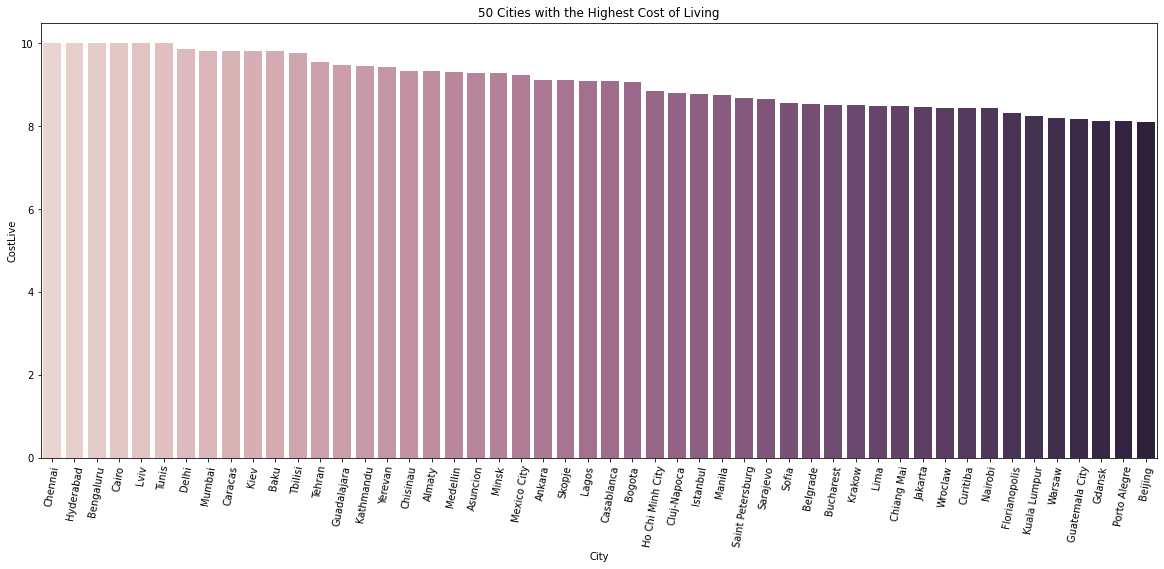

In [16]:

cityCost=pd.DataFrame(zip(data_city.UA_Name, data_city['Cost of Living']))
cityCost.columns=['City','CostLive']
new_index=(data_city['Cost of Living'].sort_values(ascending=False)).index.values
cityCost=cityCost.reindex(new_index)
cityCost.drop(cityCost[cityCost.CostLive<=0].index,inplace=True)


        
#BarPlot

#Lowest
plt.figure(figsize=(20,8))
sns.barplot(x='City',y='CostLive',data=cityCost[:197:-1],palette=sns.cubehelix_palette(50))
plt.xticks(rotation=80)
plt.title('50 Cities with the Lowest Cost of Living')
plt.show()

#Highest
plt.figure(figsize=(20,8))
sns.barplot(x='City',y='CostLive',data=cityCost[:50],palette=sns.cubehelix_palette(50))
plt.xticks(rotation=80)
plt.title('50 Cities with the Highest Cost of Living')
plt.show()



# 50 Cities with Lowest and Highest Business Freedom

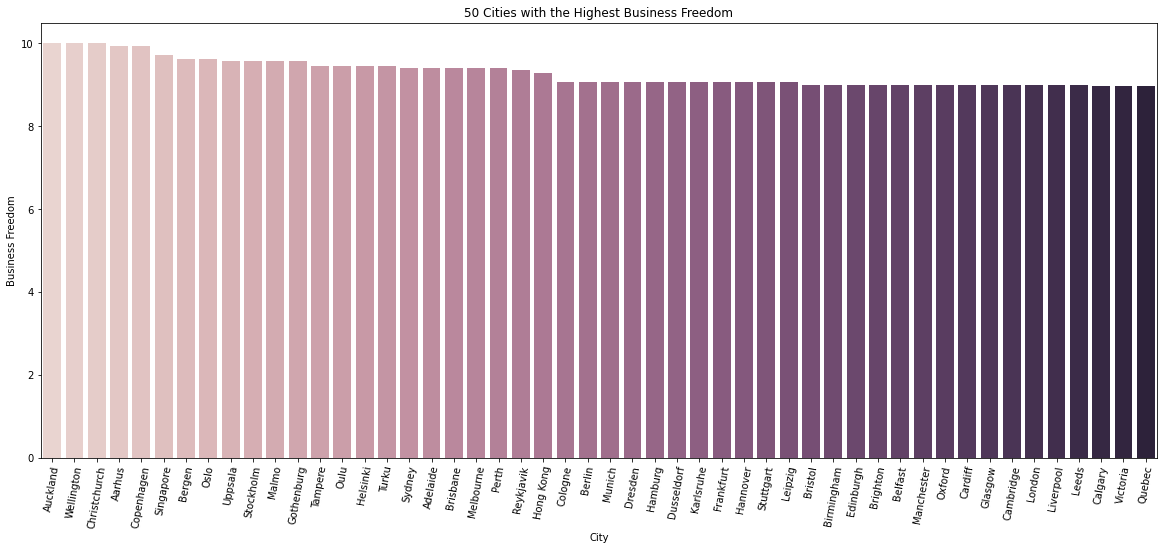

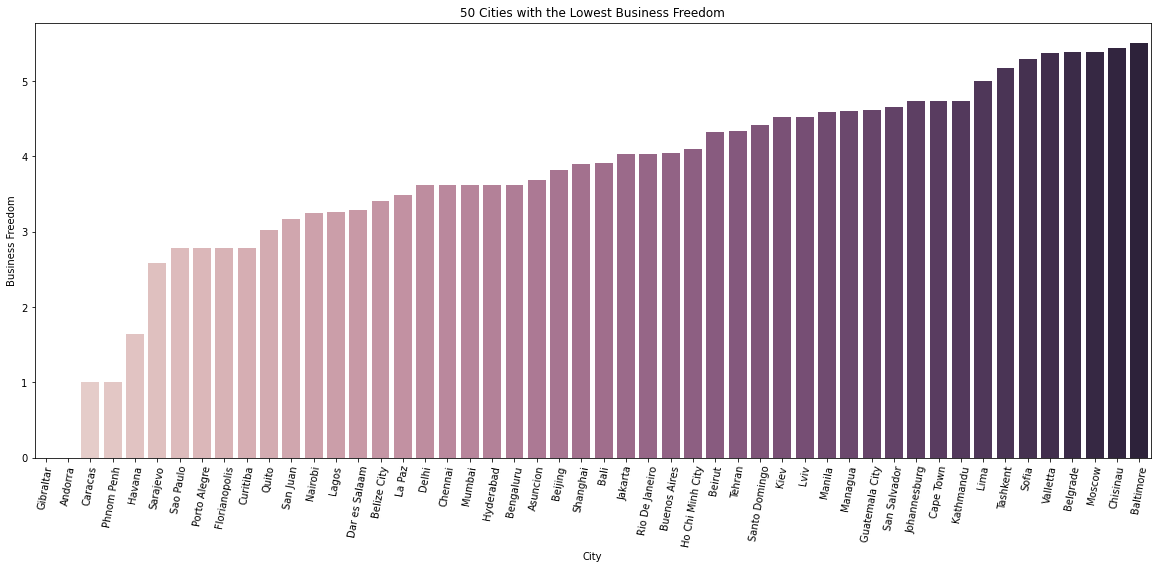

In [17]:

cityBusFree=pd.DataFrame(zip(data_city.UA_Name, data_city['Business Freedom']))
cityBusFree.columns=['City','Business Freedom']
new_index=(data_city['Business Freedom'].sort_values(ascending=False)).index.values
cityBusFree=cityBusFree.reindex(new_index)



        
#BarPlot

#Highest
plt.figure(figsize=(20,8))
sns.barplot(x='City',y='Business Freedom',data=cityBusFree[:50],palette=sns.cubehelix_palette(50))
plt.xticks(rotation=80)
plt.title('50 Cities with the Highest Business Freedom')
plt.show()

#Lowest
plt.figure(figsize=(20,8))
sns.barplot(x='City',y='Business Freedom',data=cityBusFree[:215:-1],palette=sns.cubehelix_palette(50))
plt.xticks(rotation=80)
plt.title('50 Cities with the Lowest Business Freedom')
plt.show()



# Education vs Cost of Living

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


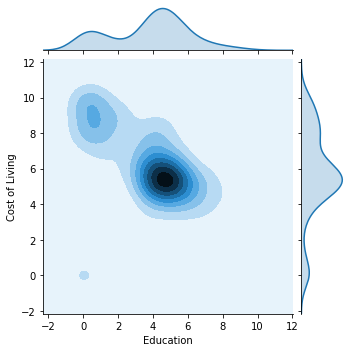

In [18]:
#Jointplot
sns.jointplot('Education','Cost of Living',data=data_city,kind='kde',size=5)

/opt/conda/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


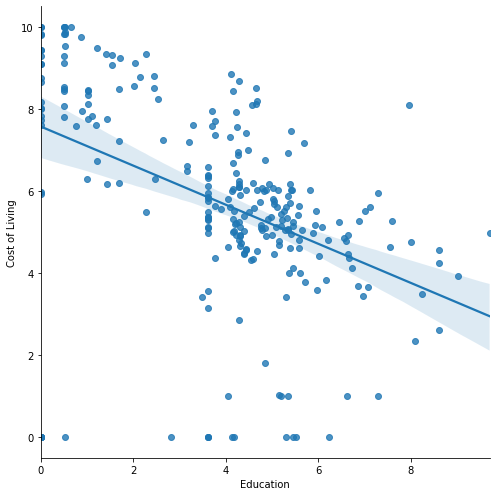

In [19]:
#lmplot
sns.lmplot('Education','Cost of Living',data=data_city,size=7)

# Education vs Business Freedom

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


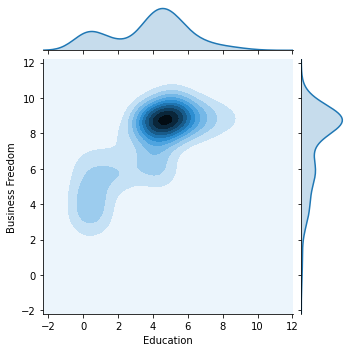

In [20]:
#Jointplot
sns.jointplot('Education','Business Freedom',data=data_city,kind='kde',size=5)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


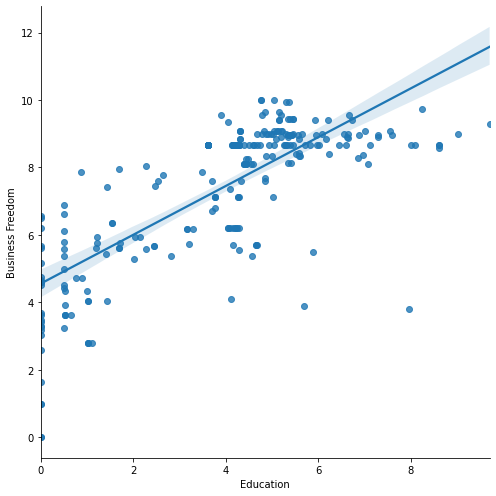

In [21]:
#lmplot
sns.lmplot('Education','Business Freedom',data=data_city,size=7)
plt.show()